**MNIST Handwritten Digits Classification using a Convolutional Neural Network (CNN)**

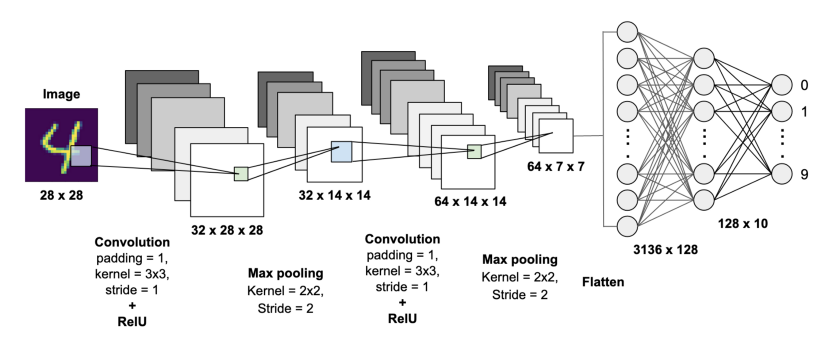

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
#model
input = keras.Input(shape=(28, 28, 1))
Conv2D_01 = layers.Conv2D(32, (3, 3), strides = (1, 1), activation ='relu', padding= 'same')(input)
MaxPooling2D_01 = layers.MaxPooling2D((2, 2), strides=(2,2))(Conv2D_01)
Conv2D_02 = layers.Conv2D(64, (3, 3), strides = (1, 1), activation ='relu', padding= 'same')(MaxPooling2D_01)
MaxPooling2D_02 = layers.MaxPooling2D((2, 2), strides=(2,2))(Conv2D_02)
flat = layers.Flatten()(MaxPooling2D_02)
Dense_01 = layers.Dense(3136, activation='relu')(flat)
Dense_02 = layers.Dense(128, activation='relu')(Dense_01)
output = layers.Dense(10, activation='softmax')(Dense_02)
model = models.Model(inputs = input, outputs=output)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0     

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.reshape((-1, 28, 28, 1))/255
x_test = x_test.reshape((-1, 28, 28, 1))/255

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 19s 6ms/step - loss: 0.1200 - accuracy: 0.9610 - val_loss: 0.0609 - val_accuracy: 0.9807
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0548 - val_accuracy: 0.9845
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0462 - val_accuracy: 0.9873
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0526 - val_accuracy: 0.9863
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0388 - val_accuracy: 0.9900
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0447 - val_accuracy: 0.9889
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0631 - val_accuracy